In [2]:
# TODO filter stopwords and improve tokenization (no , . other signs)
import pandas as pd
data = pd.read_csv("../data_semeval/articles-ground-truth-training-byarticle-20181122.csv")

In [3]:
data["text"] = data["text"].apply(lambda x: x.replace("\n", " "))

In [4]:
corpus = []
for article in data["text"]:
    corpus.append(article.split(" "))

In [5]:
import numpy as np
from gensim.sklearn_api import W2VTransformer

def transform_article(article):
    wordvecs = model.transform(article.split(" "))
    return np.mean(wordvecs, axis=0)

model = W2VTransformer(size=150, min_count=1, seed=1)
model = model.fit(corpus)

article_vecs = np.array(list(data["text"].apply(transform_article)))

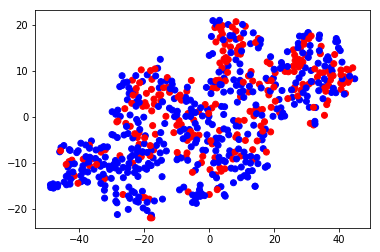

In [6]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE()
tsned = tsne.fit_transform(article_vecs)

cols = list(data["hyperpartisan"].apply(lambda x: "r" if x else "b"))

plt.scatter(tsned[:,0], tsned[:,1], c=cols)
plt.show()